In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

>**Data**

In [ ]:
insurance_dataset = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv") #"Medical Cost Personal Datasets" from https://www.kaggle.com/mirichoi0218/insurance
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


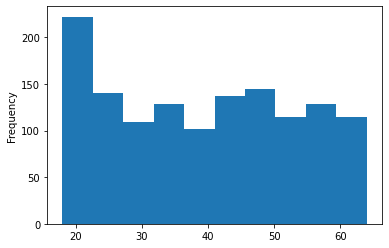

In [ ]:
insurance_dataset["age"].plot(kind="hist")

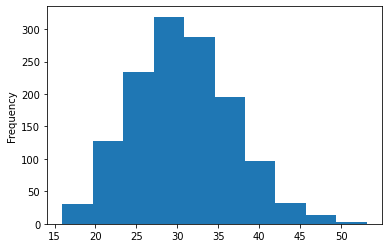

In [ ]:
insurance_dataset["bmi"].plot(kind="hist")

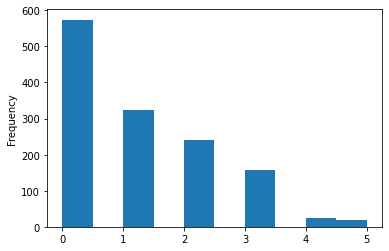

In [ ]:
insurance_dataset["children"].plot(kind="hist")

>**Preprocessing Data**

In [ ]:
#Column Transformar
ct = make_column_transformer((MinMaxScaler(),["age", "bmi", "children"]),
                             (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]))

In [ ]:
x = insurance_dataset.drop("charges", axis=1)
y = insurance_dataset["charges"]                 #because we want to predict the "charges" based on the other features like age, sex etc.
x.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
len(x), len(x_train), len(x_test), len(y), len(y_train), len(y_test)

(1338, 1070, 268, 1338, 1070, 268)

In [ ]:
ct.fit(x_train)
x_train_n = ct.transform(x_train)
x_test_n = ct.transform(x_test)

x_train_n[:5]

array([[0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.45652174, 0.49394673, 1.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.7826087 , 0.14823783, 0.6       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]])

>**Model**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)                   
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics="mae")

history = model.fit(x_train_n, y_train, epochs=50, verbose=0)
print("Finished")

Finished


>**Model Evaluation**

In [ ]:
model.evaluate(x_test_n, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3166.1951 - mae: 3166.1951


[3166.195068359375, 3166.195068359375]

Text(0, 0.5, 'loss')

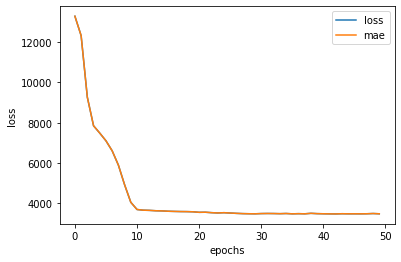

In [ ]:
#Loss Curve/Training Curve
pd.DataFrame(history.history).plot()

plt.xlabel("epochs")
plt.ylabel("loss")